In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [53]:
cols=["hnrdif", "jitterdif", "shimmerdif", "class"]
df = pd.read_csv('differences_features.csv', names=cols)
#df.head()

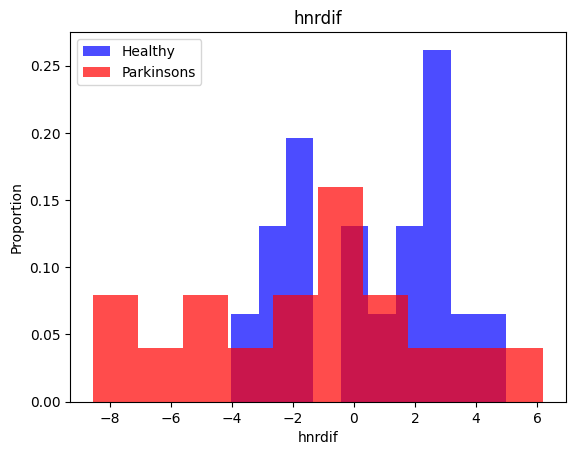

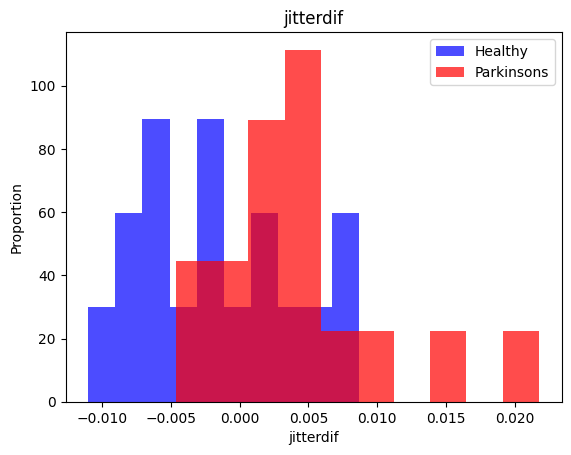

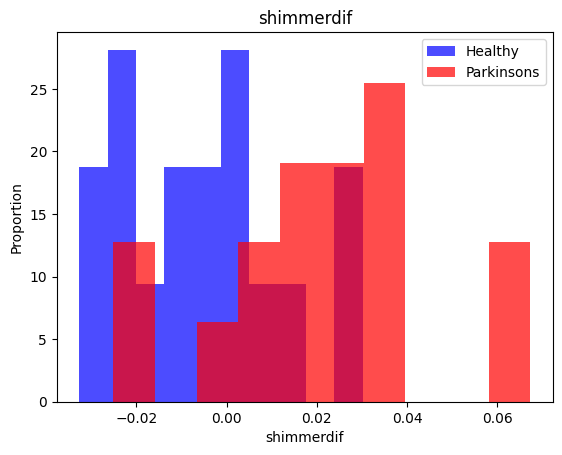

In [54]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==0][label], color='blue', label='Healthy', alpha=0.7, density=True)
    plt.hist(df[df["class"]==1][label], color='red', label='Parkinsons', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Proportion")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, test datasets

In [55]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/home/coder-sf/Python/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [56]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x,y)

    data = np.hstack((x, np.reshape(y, (-1, 1))))

    return data, x, y

In [57]:
train, x_train, y_train = scale_dataset(train, oversample=False)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

# SVM Model 

In [58]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [59]:
svm_model = SVC()
model = SVC(probability=True)
svm_model = svm_model.fit(x_train, y_train)

In [60]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

[[4 0]
 [0 3]]


In [61]:
joblib.dump(svm_model, "svm_model.pkl")

['svm_model.pkl']

# Percentages

In [62]:
model = joblib.load("svm_model.pkl")
from sklearn.svm import SVC

In [63]:
def predict_parkinsons_probability(input_data):
    # Convert input into NumPy array and reshape for prediction
    input_array = np.array(input_data).reshape(1, -1)
    model = SVC(probability=True)
    model.fit(x_train, y_train)
    # Get probabilities
    probabilities = model.predict_proba(input_array)

    # Extract probability of class 1 (Parkinson's)
    probability_of_parkinsons = probabilities[0][1] * 100  # Convert to percentage

    return probability_of_parkinsons

In [110]:
input = [-6.514726339,0.008664312479,0.02441029242]  
#print(predict_parkinsons_probability(input))
probability = predict_parkinsons_probability(input)
percentage = float(probability)
if 0<= percentage <20:
    print("Very low risk of Parkinson's")
if 20<= percentage <40:
    print ("Low risk of Parkinson's")
if 40<= percentage <60:
    print ("Moderate risk of Parkinson's")
if 60<= percentage <80:
    print ("High risk of Parkinson's")
if 80<= percentage <=100:
    print ("Very high risk of Parkinson's")

Moderate risk of Parkinson's


# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [67]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

